# Assignment 3: A baby project (Britch Columbia Public School Teacher Statistics)

### Author: Lee Kai Lok (Set 4J)

_Date: 24 Jan 2025_


#### Data Source
https://catalogue.data.gov.bc.ca/dataset/bc-schools-teacher-statistics

* The data is sourced from the BC Data Catalogue. 
* The data comprises __British Columbia Public School Teacher Statistics__ , including all data used in public reports up to 2023/2024.
* Comprehensive reports that outline the workforce statistics, including breakdowns by school year, gender, and other demographic variables.
* Data Tables: Structured datasets available in CSV format that provide detailed statistics for each school year within the specified range.
* It provides insights into various aspects of the educational workforce, including headcount, gender distribution, and other demographic factors. It includes the following attributes:

1. Data Level
2. SCHOOL_YEAR
3. REPORTING_PERIOD
4. DISTRICT_NUMBER
5. DISTRICT_NAME
6. EMPLOYMENT_CATEGORY
7. GENDER
8. HEADCOUNT
9. FTE_VALUE
10. AVERAGE_AGE
11. AVERAGE_ANNUAL_SALARY_PER_FTE

#### Data Range
* The data covers the following academic years, with Q1 and Q3 summarized data from 2013 to 2024.

#### Purpose of the Analysis
* The analysis aims to provide a comprehensive understanding of the trends and changes within the BC education workforce over the specified period. It will help identify patterns in workforce demographics, inform planning and resource allocation, and contribute to discussions around equity and representation in the education system.

#### Import the source file

In [4]:
# Import bc_education_workforce_public_schools_2013_14_to_2023_24.csv as pandas DataFrame
import pandas 

## Use the following two graphic packages
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

import re ## this for the regular expression work. 
import numpy as np




pandas.set_option('display.max_rows', None)  # Show all rows
pandas.set_option('display.max_columns', None)  # Show all columns

## and make sure our plots look good: % is pronounced "magic" which is fun
%matplotlib inline

# Import the CSV file as a pandas DataFrame
# the source data is located in data/raw folder
df = pandas.read_csv('../../Data/Raw_Data/bc_education_workforce_public_schools_2013_14_to_2023_24.csv')

#### Summary of the data

In [6]:
# Count The Number of Rows and Columns in the file 
print ("There are: ", df.shape[0], " rows and ", df.shape[1], " columns")
print ("")

# Generate all descriptive statistics. (Round in 2 dec. places)
print("")
print("The following is all descriptive statistics")
print(df.describe(include="all").round(2))


# Display the data type in each columns
print("")
print("The following is the data types of all attributes")
df.dtypes


There are:  11523  rows and  11  columns


The following is all descriptive statistics
            Data Level SCHOOL_YEAR REPORTING_PERIOD DISTRICT_NUMBER  \
count            11523       11523            11523           11523   
unique               2          11                2              61   
top     District Level   2015/2016               Q1               5   
freq             11334        1098             6036             189   

             DISTRICT_NAME EMPLOYMENT_CATEGORY GENDER HEADCOUNT FTE_VALUE  \
count                11523               11523  11523     11523     11523   
unique                  61                   3      3      1668      7684   
top     Southeast Kootenay            Educator    All       Msk       Msk   
freq                   189                3843   3843      1133      1133   

       AVERAGE_AGE AVERAGE_ANNUAL_SALARY_PER_FTE  
count        11523                         11523  
unique          23                          9078  
top             44

Data Level                       object
SCHOOL_YEAR                      object
REPORTING_PERIOD                 object
DISTRICT_NUMBER                  object
DISTRICT_NAME                    object
EMPLOYMENT_CATEGORY              object
GENDER                           object
HEADCOUNT                        object
FTE_VALUE                        object
AVERAGE_AGE                      object
AVERAGE_ANNUAL_SALARY_PER_FTE    object
dtype: object

In [7]:
# Count the number of figures are masked
print("No. of Records were marked:", df.query("HEADCOUNT=='Msk'").shape[0])
# 1133 records are masked. 

# eliminate these mask records before we analyze the data
df_new = df.query("HEADCOUNT!='Msk'")


df_new = df_new.copy()


# Convert the data type to a number for the columns with values 
df_new["HEADCOUNT"] =  pandas.to_numeric(df_new['HEADCOUNT'])
df_new["FTE_VALUE"] =  pandas.to_numeric(df_new['FTE_VALUE'])
df_new["AVERAGE_AGE"] =  pandas.to_numeric(df_new['AVERAGE_AGE'])
df_new["AVERAGE_ANNUAL_SALARY_PER_FTE"] =  pandas.to_numeric(df_new['AVERAGE_ANNUAL_SALARY_PER_FTE'])


# Check the latest data type in each column

print("")
print("The following is the updated data types of all attributes")

df_new.dtypes


No. of Records were marked: 1133

The following is the updated data types of all attributes


Data Level                        object
SCHOOL_YEAR                       object
REPORTING_PERIOD                  object
DISTRICT_NUMBER                   object
DISTRICT_NAME                     object
EMPLOYMENT_CATEGORY               object
GENDER                            object
HEADCOUNT                          int64
FTE_VALUE                        float64
AVERAGE_AGE                        int64
AVERAGE_ANNUAL_SALARY_PER_FTE      int64
dtype: object

#### Data Quality Check - The outliers

* By Boxplot Diagram

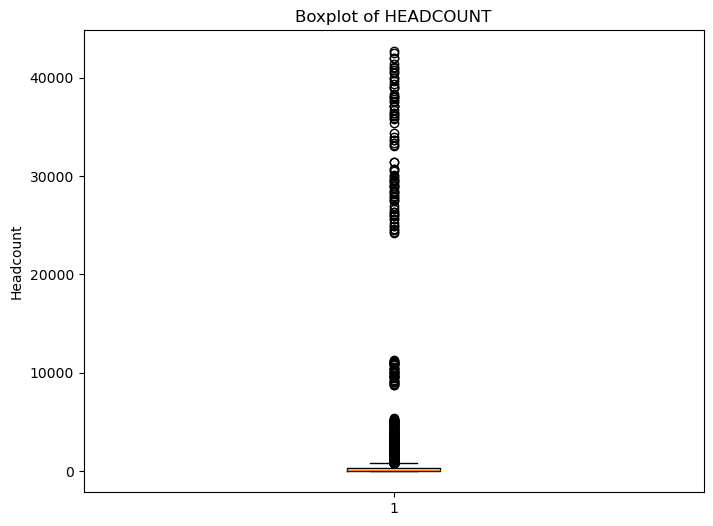

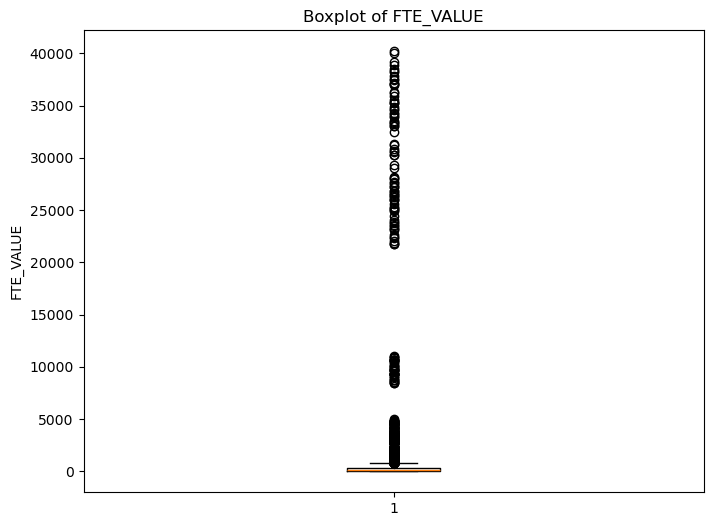

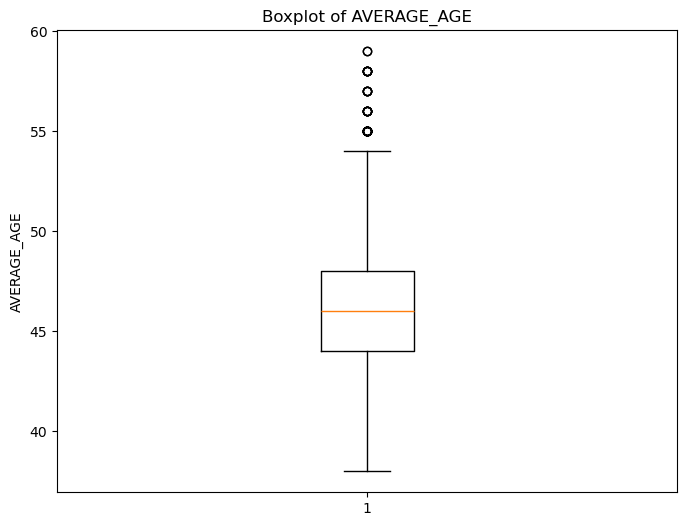

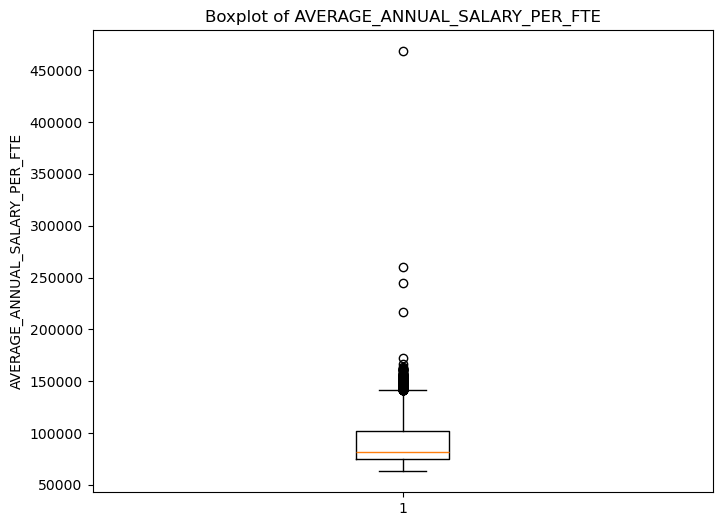

In [9]:


# Create a boxplot for 4 numeric attributes: Headcount, FTE Values, Average Age, and Average Annual Salary Per FTE

# Check the outliers - HEADCOUNT
plt.figure(figsize=(8, 6))
plt.boxplot(df_new['HEADCOUNT'])
plt.title('Boxplot of HEADCOUNT')
plt.ylabel('Headcount')
# Export the graphical presentation into visualization folder 
plt.savefig('../../Results/Visualization/boxplot_headcount.png', format='png', dpi=300) 
plt.show()

# Check the outliers - FTE Value
plt.figure(figsize=(8, 6))
plt.boxplot(df_new['FTE_VALUE'])
plt.title('Boxplot of FTE_VALUE')
plt.ylabel('FTE_VALUE')
# Export the graphical presentation into visualization folder 
plt.savefig('../../Results/Visualization/boxplot_FTE_VALUE.png', format='png', dpi=300) 
plt.show()

# Check the outliers - Average Age
plt.figure(figsize=(8, 6))
plt.boxplot(df_new['AVERAGE_AGE'])
plt.title('Boxplot of AVERAGE_AGE')
plt.ylabel('AVERAGE_AGE')
# Export the graphical presentation into visualization folder 
plt.savefig('../../Results/Visualization/boxplot_AVERAGE_AGE.png', format='png', dpi=300) 
plt.show()

# Check the outliers - Annual Salary Per FTE
plt.figure(figsize=(8, 6))
plt.boxplot(df_new['AVERAGE_ANNUAL_SALARY_PER_FTE'])
plt.title('Boxplot of AVERAGE_ANNUAL_SALARY_PER_FTE')
plt.ylabel('AVERAGE_ANNUAL_SALARY_PER_FTE')
# Export the graphical presentation into visualization folder 
plt.savefig('../../Results/Visualization/boxplot_AVERAGE_ANNUAL_SALARY_PER_FTE.png', format='png', dpi=300) 
plt.show()





* Calcuate the Number of Outliers 

In [11]:
# This is the function to calculate the no. of outliers
def count_outliers(feature, chatty=True):

    feat = feature
    # Calculate Q1, Q3, IQR, lower bound / upper bound values
    Q1 = feat.quantile(0.25)
    Q3 = feat.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if chatty:
        print("Q1:", Q1)
        print("Q3:", Q3)
        print("IQR:", IQR)
        print("Lower Bound:", lower_bound)
        print("Upper Bound:", upper_bound)

    # Identify outliers
    outliers = feat[(feat < lower_bound) | (feat > upper_bound)]
    outlier_count = outliers.count()  # Count how many outliers

    if chatty:
        print("Number of outliers:", outlier_count)

    # Clean the data by replacing outliers with NaN
    feat_cleaned = feat.where((feat >= lower_bound) & (feat <= upper_bound), np.nan)

      # Return both the cleaned data and the count of outliers
    return feat_cleaned, outlier_count

In [12]:
# Filter out rows where GENDER != 'All'
filtered_df =df_new.query("GENDER !='All'")


filtered_df = filtered_df.copy()

# Count no. of records in the data set
print ("Number to total records: ", filtered_df.shape[0])


# Count and Display the number of outliers in the attribute - HEADCOUNT
filtered_df['HEADCOUNT'], headcount_outliers = count_outliers(filtered_df['HEADCOUNT'], False)

print("")
print("")
print("Total Number of Outliers - HEADCOUNT:",headcount_outliers  )

# Count and Display the number of outliers in the attribute - AVERAGE AGE
filtered_df['AVERAGE_AGE'], age_outliers = count_outliers(filtered_df['AVERAGE_AGE'], False)
print("")
print("")
print("Total Number of Outliers - AVERAGE_AGE:",age_outliers  )


# Count and Display the number of outliers in the attribute - FTE Value
filtered_df['FTE_VALUE'], fte_outliers = count_outliers(filtered_df['FTE_VALUE'], False)
print("")
print("")
print("Total Number of Outliers - FTE_VALUE:",fte_outliers  )

# Count and Display the number of outliers in the attribute - Average annual salary per fte
filtered_df['AVERAGE_ANNUAL_SALARY_PER_FTE'], salary_outliers = count_outliers(filtered_df['AVERAGE_ANNUAL_SALARY_PER_FTE'], False)
print("")
print("")
print("Total Number of Outliers - AVERAGE_ANNUAL_SALARY_PER_FTE:",salary_outliers  )



Number to total records:  6689


Total Number of Outliers - HEADCOUNT: 775


Total Number of Outliers - AVERAGE_AGE: 23


Total Number of Outliers - FTE_VALUE: 769


Total Number of Outliers - AVERAGE_ANNUAL_SALARY_PER_FTE: 262


#### Clean the masked data to facilitate to data analysis

In [14]:
## # This function used to clean the numeric data values  
def clean_numbers(word):

    # Check the data type of the parameter if it's integer or floating number, then directly return
    if isinstance(word, (int, float)):
        return word
    # If it's a character, try to pull out numbers
    elif isinstance(word, str):
        match = re.search(r"[-+]?\d*\.?\d+", word)
        if match:
            if '.' in match.group():
                return float(match.group())
            else:
                return int(match.group())
    # If there is nothing, make it an NA value
    else:
        return np.nan


# Clean the following 4 numeric columns
df_new_clean = df
df_new_clean["HEADCOUNT"] = df_new_clean["HEADCOUNT"].apply(clean_numbers)
df_new_clean["FTE_VALUE"] = df_new_clean["FTE_VALUE"].apply(clean_numbers)
df_new_clean["AVERAGE_AGE"] = df_new_clean["AVERAGE_AGE"].apply(clean_numbers)
df_new_clean["AVERAGE_ANNUAL_SALARY_PER_FTE"] = df_new_clean["AVERAGE_ANNUAL_SALARY_PER_FTE"].apply(clean_numbers)

# check number of masked record after data clean 
print("No. of Records were marked (after data clean):", df_new_clean.query("HEADCOUNT=='Msk'").shape[0])
# 0 record is expected

No. of Records were marked (after data clean): 0


### Usage
To explore the datasets and analyses, it provides: 

* __Informed Workforce Planning__: The analysis provides insights into teacher demographics and trends, enabling effective workforce planning and resource allocation to address staffing needs in particular districts 

* __Promotion of Equity and Diversity__: By examining gender distribution and other demographic factors in each district, the findings can guide initiatives aimed at enhancing equity and representation within the teaching workforce. For instance, the data reveals that the number of female teachers is significantly larger than that of male teachers across all three types of occupations over the past years. This insight could inform policies that encourage more male candidates to consider careers in education, helping to balance gender representation in the workforce.

* __Academic Studies__: Provide a foundation for academic research related to teacher demographics, retention rates, and student outcomes, contributing to the broader field of education studies.



#### Data Visualization - Graph

##### Graph 1 - Line Graph 

__Insight__

* The upward trend in headcount can inform future planning and resource allocation, indicating a need for continued support for employee growth and development.

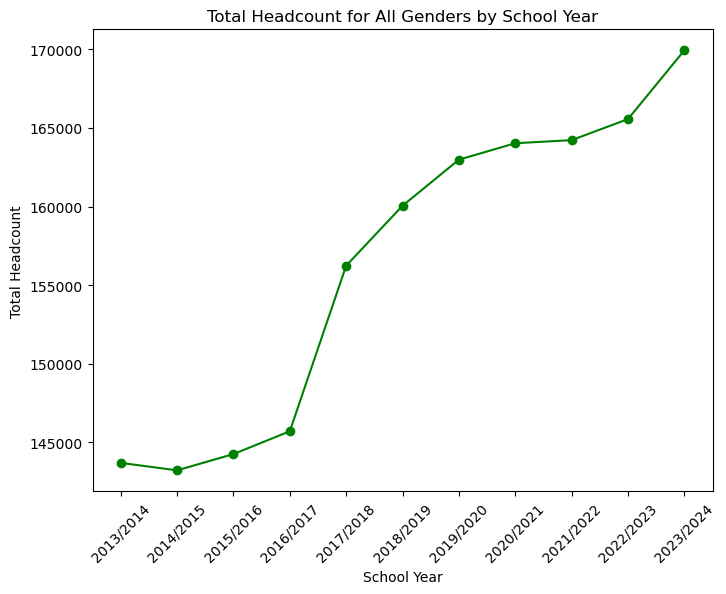

In [18]:

# Graph 1 - Line Graph
# Show the total headcount by year



## In order to avoid duplication count, exclude record gener = male and female and calculate "All" Records only and focus on Q1 data
filtered_df = df_new_clean[(df_new_clean['GENDER'] == 'All' )& (df_new_clean['REPORTING_PERIOD'] == 'Q1')]

# Group by SCHOOL_YEAR and sum HEADCOUNT
yearly_headcount = filtered_df.groupby('SCHOOL_YEAR')['HEADCOUNT'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(yearly_headcount['SCHOOL_YEAR'], yearly_headcount['HEADCOUNT'], color='green', marker= 'o')
plt.title('Total Headcount for All Genders by School Year')
plt.xlabel('School Year')
plt.ylabel('Total Headcount')
plt.xticks(rotation=45)

# Save the graph into visualization folder
plt.savefig('../../Results/Visualization/linechart.png', format='png', dpi=300) 
plt.show()


##### Graph 2 - Column Graph

__Insight__

* The graph highlights a noticeable gender disparity, with male employees consistently outnumbering female employees across all school years.

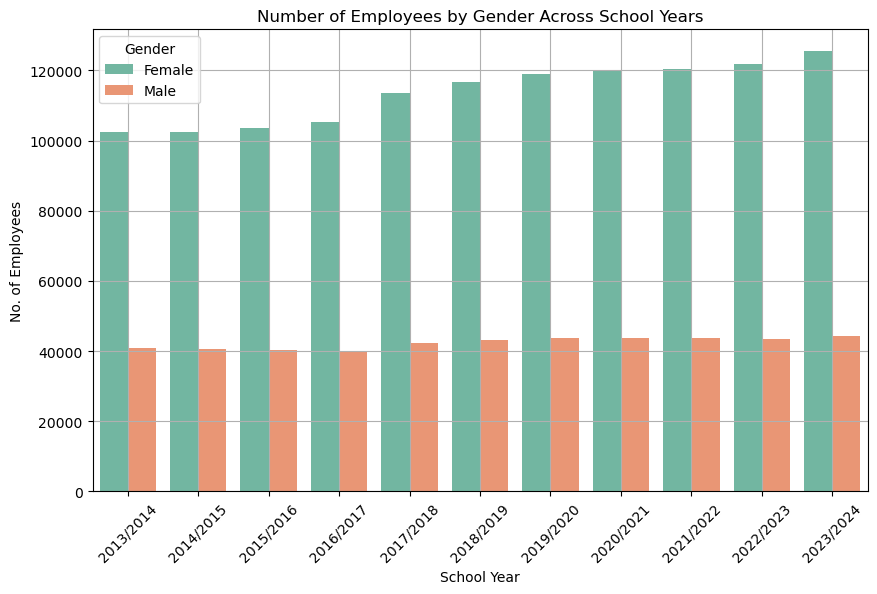

In [20]:
# Graph 2 - Column Graph


## In order to avoid duplication count, exclude record gener = male and female and calculate "All" Records only and focus on Q1 data
filtered_df = df_new_clean[(df_new_clean['GENDER'] != 'All' )& (df_new_clean['REPORTING_PERIOD'] == 'Q1') ]

# Group by SCHOOL_YEAR and sum HEADCOUNT
yearly_headcount = filtered_df.groupby(['SCHOOL_YEAR','GENDER'])['HEADCOUNT'].sum().reset_index()

yearly_headcount.head(3)

plt.figure(figsize=(10, 6))
 

sns.barplot(x="SCHOOL_YEAR", y="HEADCOUNT", hue="GENDER", data=yearly_headcount, palette="Set2")

plt.title("Number of Employees by Gender Across School Years")
plt.xlabel("School Year")
plt.ylabel("No. of Employees")
plt.legend(title="Gender")
plt.grid(True)
plt.xticks(rotation=45)

# Save the graph into visualization folder
plt.savefig('../../Results/Visualization/barchart.png', format='png', dpi=300) 
plt.show()

##### Graph 3 - Stacked Column Graph

__Insight__

* The administrative category has notably fewer employees compared to educators and teachers. This could imply a lean administrative structure in BC. 

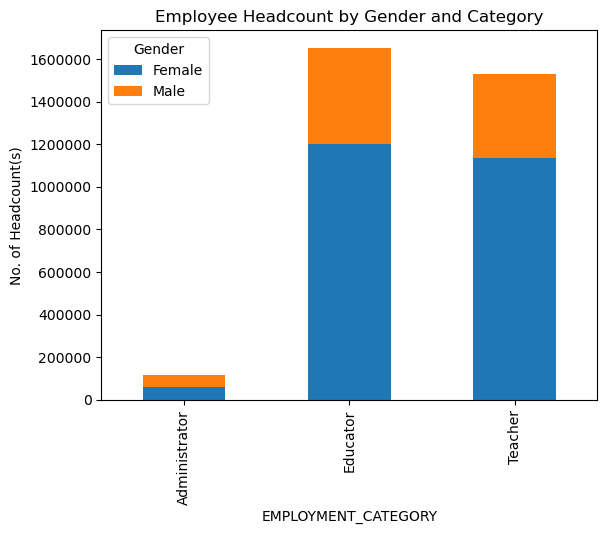

In [22]:
# Graph 3 - Stacked Column Graph 

fig, ax = plt.subplots()

df_new_clean.query("GENDER!='All'").groupby(['EMPLOYMENT_CATEGORY', 'GENDER'])["HEADCOUNT"].sum().reset_index()\
                    .pivot_table(index='EMPLOYMENT_CATEGORY', columns='GENDER', values='HEADCOUNT')\
                    .plot(kind='bar', stacked=True, ax=ax)

ax.legend(title='Gender')
ax.set_ylabel('No. of Headcount(s)')
ax.set_title('Employee Headcount by Gender and Category')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Save the graph into the visualization folder
plt.savefig('../../Results/Visualization/stackbar.png', format='png', dpi=300) 
plt.show()




#### Data Visualization - Summary

##### Summary 1 - The number of headcount by school year, reporting period and employment category

__Insight__

* When compare the total headcounts between Q1 and Q4 in each school year, there is an overall upward trend except for the school year 2019-2020 - the number of teachers in Q4 is smaller than in Q1. This decrease may be the impact of the pandemic, which could have led to temporary school closures. Further investigation may be required to understand the underlying factors contributing to this special fluctuation.

In [25]:
# Summary 1
# The Pivot table show the number of headcount by school year, reporting period and employment category
df_new_all_gender = df_new_clean.query("GENDER == 'All'"); 

                     
print(df_new_all_gender.pivot_table(index = ['SCHOOL_YEAR', 'REPORTING_PERIOD', 'EMPLOYMENT_CATEGORY'], 
                              values = ['HEADCOUNT'], 
                              aggfunc = ['sum']))


                                                       sum
                                                 HEADCOUNT
SCHOOL_YEAR REPORTING_PERIOD EMPLOYMENT_CATEGORY          
2013/2014   Q1               Administrator          5446.0
                             Educator              71870.0
                             Teacher               66377.0
            Q4               Administrator          5435.0
                             Educator              72827.0
                             Teacher               67343.0
2014/2015   Q1               Administrator          5426.0
                             Educator              71631.0
                             Teacher               66160.0
            Q4               Administrator          5382.0
                             Educator              73406.0
                             Teacher               67980.0
2015/2016   Q1               Administrator          5410.0
                             Educator              72149

##### Summary 2 - The number of average headcounts by district 
__Insight__

* The range of headcounts indicates diversity in district sizes and resources, which may influence staffing, student-to-teacher ratios, and educational outcomes. For instance, BC Public Schools, Surrey, and Vancouver have the highest average headcounts in British Columbia, reflecting their larger populations and potentially greater educational needs.

In [27]:
# Summary 2 
# Show the number of headcounts by districts in BC
df_district = df_new_clean.groupby(["DISTRICT_NAME"])["HEADCOUNT"].mean().round(2).sort_values(ascending=False)

print(df_district)


DISTRICT_NAME
BC Public Schools               17472.99
Surrey                           2156.04
Vancouver                        1522.80
Coquitlam                        1003.66
Burnaby                           818.34
Langley                           691.85
Central Okanagan                  681.19
Richmond                          670.54
Greater Victoria                  641.51
Abbotsford                        583.43
Delta                             515.33
North Vancouver                   504.11
Maple Ridge-Pitt Meadows          471.79
Kamloops-Thompson                 451.60
Nanaimo-Ladysmith                 423.35
Prince George                     404.52
Chilliwack                        403.64
Sooke                             341.46
Comox Valley                      267.96
Vernon                            265.89
Cowichan Valley                   257.65
Saanich                           241.69
Conseil scolaire francophone      234.11
West Vancouver                    228.04
Ne

#### Output the cleaned data 

In [29]:

# Export the cleaned data 
df_new_clean.to_csv('../../Data/Clean_Data/bc_education_workforce_public_schools_2013_14_to_2023_24_clean.csv', index=False)




#### Reference

* https://stackoverflow.com/questions/64858113/stacked-bar-chart-in-matplotlib
* https://stackoverflow.com/questions/40511476/how-to-properly-use-funcformatterfunc
* https://stackoverflow.com/questions/52241417/how-do-i-change-a-bar-graph-to-a-line-graph-in-python
* https://stackoverflow.com/questions/78469275/to-numeric-adds-a-decimal-to-all-numeric-values
* https://stackoverflow.com/questions/31761723/python-pandas-display-all-rows-without-omitting
* https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order

